In [1]:
def reproduceResult():
  seed_value= 0

  
  with tf.device("/gpu:0"):
    ...


  os.environ['PYTHONHASHSEED']=str(seed_value)
  np.random.seed(0)
  rn.seed(0)


  session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, 
                                          inter_op_parallelism_threads=1)


  tf.compat.v1.set_random_seed(seed_value)
  sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
  tf.compat.v1.keras.backend.set_session(sess)
  tf.compat.v1.keras.backend.clear_session()

  


In [2]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
  
import os 
import numpy as np
import tensorflow as tf
import random as rn
from tensorflow import keras

reproduceResult()
# %tensorflow_version 2.x
# import tensorflow as tf
# tf.test.gpu_device_name()
# from scipy import integrate
# import os
# import numpy as np
# from tensorflow import keras
import tempfile
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
# import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import backend as K


from tensorflow.keras import callbacks

from keras_lr_finder import LRFinder
from clr.clr_callback import CyclicLR

import tensorflow_model_optimization as tfmot

import tqdm

import keras_tuner
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from attention import Attention

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math


from keras.preprocessing.text import Tokenizer


import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import PorterStemmer
from sklearn import preprocessing

from bnlp import SentencepieceTokenizer
import gensim
import fasttext 

C:\Users\moshi\AppData\Local\Temp\ipykernel_22736\2832172220.py:43: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [3]:
df_train = pd.read_csv('F:/Context_Aware_Data_Cleaning_Deep/SENTNOB/Dataset/sentnob_train.csv')
df_test = pd.read_csv('F:/Context_Aware_Data_Cleaning_Deep/SENTNOB/Dataset/sentnob_val.csv')

In [4]:
df_train.head

<bound method NDFrame.head of                                                     Data  Label
0      মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...      1
1      এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায়...      2
2                              ভাই আপনার কথাই যাদু রয়েছে      1
3                            উওরটা আমার অনেক ভাল লেগেছে       1
4      আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ?...      0
...                                                  ...    ...
12570  বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চলে...      1
12571  আমার সোনার বাংলাতে এমন রক্ষক নামের ভক্ষকের কোন...      2
12572  ওনারা এত হাইজিনিক ও এত সুন্দর পরিবেশে রান্না ক...      1
12573  বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকার...      2
12574         বসুন্ধরা শাখার হাজি বিরিয়ানি একবারেই ফালতু      2

[12575 rows x 2 columns]>

In [5]:
df_train.isnull()

,Data,Label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
12570,False,False
12571,False,False
12572,False,False
12573,False,False


In [6]:
df_train.dropna(inplace=True)

In [7]:
df_train.groupby("Label").describe()

Data                                                               
      count unique                                                top freq
Label                                                                     
0      2894   2809  প্রেমেণ্ট ভিসা নিশ্চিত হওয়ার পরে , অগ্রীম কোনো...    3
1      5133   4986  আমি কাউকে শুধু ধন্যবাদ দিতে চাই না , এতটুকু বল...    3
2      4548   4350  কুত্তারবাচ্ছা , তোর জন্মই ত পতিতালয়ে । তা না হ...    3

In [8]:
df_train["Label"].value_counts()

1    5133
2    4548
0    2894
Name: Label, dtype: int64

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from bnlp import NLTKTokenizer

In [10]:
from bnlp import CleanText

clean_text = CleanText(
   fix_unicode=True,
   unicode_norm=True,
   unicode_norm_form="NFKC",
   remove_url=True,
   remove_email=True,
   remove_emoji=False,
   remove_number=False,
   remove_digits=False,
   remove_punct=False,
   replace_with_url="<URL>",
   replace_with_email="<EMAIL>",
   replace_with_number="<NUMBER>",
   replace_with_digit="<DIGIT>",
   replace_with_punct = "<PUNC>"
)

In [11]:
df_train['Data'] = df_train['Data'].apply(clean_text)
df_test['Data'] = df_test['Data'].apply(clean_text)

In [12]:
# train, test = train_test_split(df, test_size=0.2, stratify = df["classes"], random_state = 42)
num_classes = 3
embed_num_dims = 300
max_seq_len = 50

x_train = df_train['Data']
x_test = df_test['Data']

y_train = df_train['Label']
y_test = df_test['Label']

texts_train = x_train
texts_test = x_test

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train['Data'])

sequence_train = tokenizer.texts_to_sequences(texts_train)
sequence_test = tokenizer.texts_to_sequences(texts_test)

index_of_words = tokenizer.word_index

vocab_size = len(index_of_words) + 1

print('Number of unique words: {}'.format(len(index_of_words)))

X_train_pad = pad_sequences(sequence_train, maxlen = max_seq_len, padding='pre' )
X_test_pad = pad_sequences(sequence_test, maxlen = max_seq_len,  padding='pre')

print(X_train_pad)

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


Number of unique words: 23875
[[    0     0     0 ...   139  1695  6902]
 [    0     0     0 ...   464  6904   122]
 [    0     0     0 ...  1412 11423  1344]
 ...
 [    0     0     0 ...  2149   801    13]
 [    0     0     0 ...    30   122    48]
 [    0     0     0 ...   204  9954   450]]


In [13]:
# META EMBADDING

In [14]:
def create_embedding_matrix(word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    with open('F:/Python_code/embedding/glove.840B.300d.txt',encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
    return embedding_matrix


embedd_matrix_glove = create_embedding_matrix(index_of_words, embed_num_dims)
print(embedd_matrix_glove.shape)

(23876, 300)


# Random Search

In [15]:
from tensorflow.keras import regularizers
import time
LOG_DIR = f"{int(time.time())}"
seed_value= 0



def build_model(hp):
  
  reproduceResult()

  print('Ya it comes here')
  fake_val = hp.Int("cnn_1_unit",min_value =16, max_value = 96, step = 16)
  cnn_1_unit = hp.Int("cnn_1_unit",min_value =16, max_value = 96, step = 16)
  cnn_1_dropout = hp.Float("cnn_1_dropout",min_value = 0.1,max_value = 0.3,step = 0.1)

  lstm_unit = hp.Int("lstm_unit",min_value =64, max_value = 256, step = 32)
  lstm_dropout = hp.Float("lstm_dropout",min_value = 0.1,max_value = 0.5,step = 0.1)




  seq_input = keras.layers.Input(shape=(max_seq_len,))

  embedded = keras.layers.Embedding(vocab_size,
                          embed_num_dims,
                          input_length = max_seq_len,
                          weights = [embedd_matrix_glove])(seq_input)

  cnn = keras.layers.Conv1D(cnn_1_unit,3,kernel_regularizer=regularizers.l2(1e-4),
                            bias_regularizer=regularizers.l2(1e-2),
                            activity_regularizer=regularizers.l2(1e-4))(embedded)
  cnn = keras.layers.Activation(activation='relu')(cnn)
  cnn = keras.layers.BatchNormalization()(cnn)
  cnn = keras.layers.Dropout(cnn_1_dropout,seed=seed_value)(cnn)

  lstm = keras.layers.Bidirectional(keras.layers.LSTM(lstm_unit, recurrent_regularizer=regularizers.l2(1e-4),
                                                      return_sequences=True,kernel_regularizer=regularizers.l2(1e-4),
                                                      bias_regularizer=regularizers.l2(1e-2),
                                                      activity_regularizer=regularizers.l2(1e-4),input_shape =(48,)))(cnn)
  lstm = keras.layers.Activation(activation='relu')(lstm)
  lstm = keras.layers.BatchNormalization()(lstm)
  lstm = keras.layers.Dropout(lstm_dropout,seed=seed_value)(lstm)
  
  
  max_pooling = keras.layers.GlobalMaxPooling1D()(lstm)
  output = keras.layers.Dense(num_classes, activation='softmax')(max_pooling)

  model = keras.Model(inputs = [seq_input], outputs = output)
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

  return model


stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                              patience=5,
                              restore_best_weights=True,
                              verbose=0, mode='max')


clr_step_size = int((len(X_train_pad)/64))
base_lr = 1e-3
max_lr = 6e-3
mode = 'exp_range'


clr = CyclicLR(base_lr = base_lr, max_lr = max_lr, step_size = clr_step_size, mode = mode)



tuner = RandomSearch(
    build_model,
    objective = keras_tuner.Objective('val_accuracy', direction="max"),
    max_trials = 30,
    executions_per_trial = 1,
    directory = LOG_DIR
    )
  
tuner.search(x=X_train_pad,y = y_train,epochs = 30, batch_size = 64,callbacks = [stop,clr], 
             validation_data = (X_test_pad,y_test))


tuner.results_summary()

Trial 30 Complete [00h 00m 44s]
val_accuracy: 0.69878751039505

Best val_accuracy So Far: 0.7032546401023865
Total elapsed time: 00h 24m 01s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in 1708553512\untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 22 summary
Hyperparameters:
cnn_1_unit: 32
cnn_1_dropout: 0.1
lstm_unit: 128
lstm_dropout: 0.5
Score: 0.7032546401023865

Trial 17 summary
Hyperparameters:
cnn_1_unit: 96
cnn_1_dropout: 0.2
lstm_unit: 192
lstm_dropout: 0.5
Score: 0.7026164531707764

Trial 24 summary
Hyperparameters:
cnn_1_unit: 48
cnn_1_dropout: 0.1
lstm_unit: 192
lstm_dropout: 0.30000000000000004
Score: 0.7026164531707764

Trial 04 summary
Hyperparameters:
cnn_1_unit: 32
cnn_1_dropout: 0.2
lstm_unit: 64
lstm_dropout: 0.1
Score: 0.701978325843811

Trial 06 summary
Hyperparameters:
cnn_1_unit: 64
cnn_1_dropout: 0.1
lstm_unit: 160
lstm_dropout: 0.5
Score: 0.701978325843811

Trial 19 summary
Hyperparameters:
cnn_1_u

In [16]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
cnn_1_unit (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 96, 'step': 16, 'sampling': 'linear'}
cnn_1_dropout (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.3, 'step': 0.1, 'sampling': 'linear'}
lstm_unit (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
lstm_dropout (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}


In [17]:
#get best hypoerparamter
best_hps = tuner.get_best_hyperparameters()[0]
model = build_model(best_hps)

Ya it comes here


In [18]:
history = model.fit(x=X_train_pad,y = y_train,epochs = 30, batch_size = 64,callbacks = [stop,clr], 
             validation_data = (X_test_pad,y_test))

Epoch 1/30
197/197 [==============================] - 7s 24ms/step - loss: 3.0630 - accuracy: 0.5459 - val_loss: 1.7596 - val_accuracy: 0.4014
Epoch 2/30
197/197 [==============================] - 4s 21ms/step - loss: 0.9259 - accuracy: 0.7878 - val_loss: 1.0134 - val_accuracy: 0.6924
Epoch 3/30
197/197 [==============================] - 4s 20ms/step - loss: 0.3944 - accuracy: 0.9122 - val_loss: 1.0705 - val_accuracy: 0.6503
Epoch 4/30
197/197 [==============================] - 4s 21ms/step - loss: 0.3448 - accuracy: 0.9132 - val_loss: 0.8249 - val_accuracy: 0.7141
Epoch 5/30
197/197 [==============================] - 4s 20ms/step - loss: 0.2020 - accuracy: 0.9593 - val_loss: 1.1168 - val_accuracy: 0.6662
Epoch 6/30
197/197 [==============================] - 4s 20ms/step - loss: 0.2201 - accuracy: 0.9551 - val_loss: 0.9242 - val_accuracy: 0.6879
Epoch 7/30
197/197 [==============================] - 4s 20ms/step - loss: 0.1683 - accuracy: 0.9682 - val_loss: 1.4608 - val_accuracy: 0.6918

In [19]:
def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

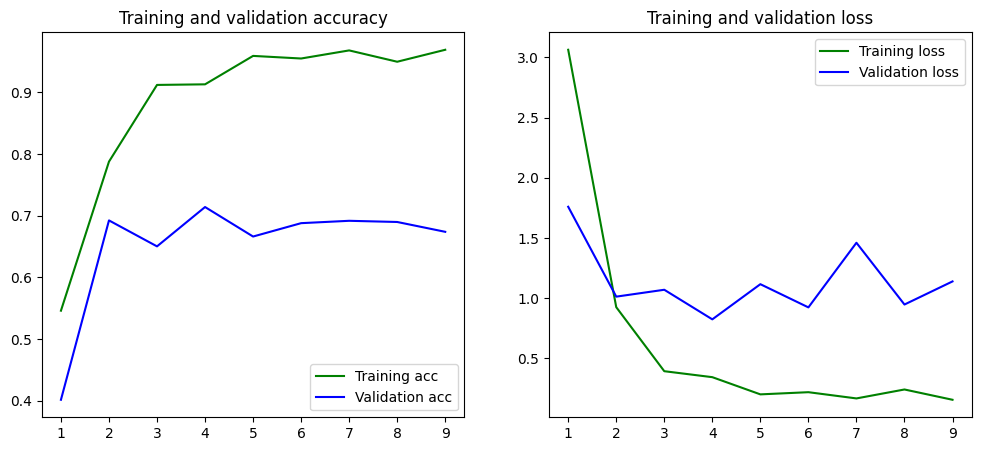

In [20]:
PlotGraph(history)

In [21]:
predict = model.predict(X_test_pad)
predict_class = np.argmax(predict, axis=1)
predict_class = np.array(predict_class)
predict_class

49/49 [==============================] - 1s 6ms/step


array([1, 1, 1, ..., 1, 2, 0], dtype=int64)

In [22]:
predict_lables=np.argmax(y_test, axis=1)
predict_lables

array([1, 2, 1, ..., 1, 2, 0], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predict_lables, predict_class)
cm

array([[178,  90,  86],
       [ 71, 485,  67],
       [ 71,  63, 456]], dtype=int64)

In [24]:
encoding = {
    0: "Neutral",
    1: "Positive",
    2: "Negative"
}

In [25]:
class_names = list(encoding.values())

In [26]:
print(class_names)

['Neutral', 'Positive', 'Negative']


<Axes: >

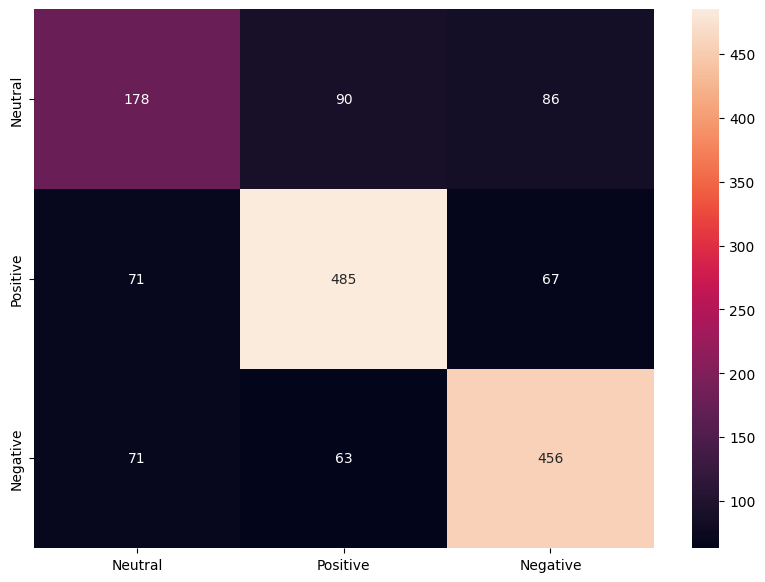

In [27]:
df_cm = pd.DataFrame(cm, index=class_names,columns=class_names)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm,annot=True, fmt ="d")

In [28]:
from sklearn.metrics import classification_report
print(classification_report(predict_lables, predict_class, target_names =class_names))

              precision    recall  f1-score   support

     Neutral       0.56      0.50      0.53       354
    Positive       0.76      0.78      0.77       623
    Negative       0.75      0.77      0.76       590

    accuracy                           0.71      1567
   macro avg       0.69      0.68      0.69      1567
weighted avg       0.71      0.71      0.71      1567

